In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Data Preprocessing

In [2]:
import pandas as pd

weather = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IOT/data.csv", index_col="DATE")

In [3]:
weather

,STATION,NAME,PRCP,TMAX,TMIN
DATE,,,,,
1/1/2003,VMM00048855,"DANANG INTERNATIONAL, VM",0.17,26,20
1/2/2003,VMM00048855,"DANANG INTERNATIONAL, VM",0.03,27,
1/3/2003,VMM00048855,"DANANG INTERNATIONAL, VM",0.10,24,
1/4/2003,VMM00048855,"DANANG INTERNATIONAL, VM",0.21,21,
1/5/2003,VMM00048855,"DANANG INTERNATIONAL, VM",0.31,23,
...,...,...,...,...,...
1/14/2024,VMM00048855,"DANANG INTERNATIONAL, VM",0.00,28,21
1/15/2024,VMM00048855,"DANANG INTERNATIONAL, VM",0.07,27,21
1/16/2024,VMM00048855,"DANANG INTERNATIONAL, VM",0.07,27,21


In [4]:
weather['TMAX'] = pd.to_numeric(weather['TMAX'], errors='coerce').astype('float')
weather['TMIN'] = pd.to_numeric(weather['TMIN'], errors='coerce').astype('float')

In [5]:
weather = weather.ffill()

In [6]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]
null_pct

STATION    0.0
NAME       0.0
PRCP       0.0
TMAX       0.0
TMIN       0.0
dtype: float64

In [7]:
valid_columns = weather.columns[null_pct < .05]

In [8]:
valid_columns

Index(['STATION', 'NAME', 'PRCP', 'TMAX', 'TMIN'], dtype='object')

In [9]:
weather = weather[valid_columns].copy()

In [10]:
weather.columns = weather.columns.str.lower()

In [11]:
weather

,station,name,prcp,tmax,tmin
DATE,,,,,
1/1/2003,VMM00048855,"DANANG INTERNATIONAL, VM",0.17,26.0,20.0
1/2/2003,VMM00048855,"DANANG INTERNATIONAL, VM",0.03,27.0,20.0
1/3/2003,VMM00048855,"DANANG INTERNATIONAL, VM",0.10,24.0,20.0
1/4/2003,VMM00048855,"DANANG INTERNATIONAL, VM",0.21,21.0,20.0
1/5/2003,VMM00048855,"DANANG INTERNATIONAL, VM",0.31,23.0,20.0
...,...,...,...,...,...
1/14/2024,VMM00048855,"DANANG INTERNATIONAL, VM",0.00,28.0,21.0
1/15/2024,VMM00048855,"DANANG INTERNATIONAL, VM",0.07,27.0,21.0
1/16/2024,VMM00048855,"DANANG INTERNATIONAL, VM",0.07,27.0,21.0


In [13]:
weather.dtypes

station     object
name        object
prcp       float64
tmax       float64
tmin       float64
dtype: object

In [14]:
weather.index

Index(['1/1/2003', '1/2/2003', '1/3/2003', '1/4/2003', '1/5/2003', '1/6/2003',
       '1/7/2003', '1/8/2003', '1/9/2003', '1/10/2003',
       ...
       '1/9/2024', '1/10/2024', '1/11/2024', '1/12/2024', '1/13/2024',
       '1/14/2024', '1/15/2024', '1/16/2024', '1/17/2024', '1/18/2024'],
      dtype='object', name='DATE', length=7685)

In [15]:
weather.index = pd.to_datetime(weather.index)

In [16]:
weather.index.year.value_counts().sort_index()

2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    362
2022    365
2023    365
2024     18
Name: DATE, dtype: int64

In [17]:
weather["target"] = weather.shift(-1)["tmax"]

In [18]:
weather

,station,name,prcp,tmax,tmin,target
DATE,,,,,,
2003-01-01,VMM00048855,"DANANG INTERNATIONAL, VM",0.17,26.0,20.0,27.0
2003-01-02,VMM00048855,"DANANG INTERNATIONAL, VM",0.03,27.0,20.0,24.0
2003-01-03,VMM00048855,"DANANG INTERNATIONAL, VM",0.10,24.0,20.0,21.0
2003-01-04,VMM00048855,"DANANG INTERNATIONAL, VM",0.21,21.0,20.0,23.0
2003-01-05,VMM00048855,"DANANG INTERNATIONAL, VM",0.31,23.0,20.0,22.0
...,...,...,...,...,...,...
2024-01-14,VMM00048855,"DANANG INTERNATIONAL, VM",0.00,28.0,21.0,27.0
2024-01-15,VMM00048855,"DANANG INTERNATIONAL, VM",0.07,27.0,21.0,27.0
2024-01-16,VMM00048855,"DANANG INTERNATIONAL, VM",0.07,27.0,21.0,27.0


In [19]:
weather = weather.ffill()

In [20]:
weather

,station,name,prcp,tmax,tmin,target
DATE,,,,,,
2003-01-01,VMM00048855,"DANANG INTERNATIONAL, VM",0.17,26.0,20.0,27.0
2003-01-02,VMM00048855,"DANANG INTERNATIONAL, VM",0.03,27.0,20.0,24.0
2003-01-03,VMM00048855,"DANANG INTERNATIONAL, VM",0.10,24.0,20.0,21.0
2003-01-04,VMM00048855,"DANANG INTERNATIONAL, VM",0.21,21.0,20.0,23.0
2003-01-05,VMM00048855,"DANANG INTERNATIONAL, VM",0.31,23.0,20.0,22.0
...,...,...,...,...,...,...
2024-01-14,VMM00048855,"DANANG INTERNATIONAL, VM",0.00,28.0,21.0,27.0
2024-01-15,VMM00048855,"DANANG INTERNATIONAL, VM",0.07,27.0,21.0,27.0
2024-01-16,VMM00048855,"DANANG INTERNATIONAL, VM",0.07,27.0,21.0,27.0


2. Model Building and Training

In [21]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=.1)

In [22]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

In [23]:
def backtest(weather, model, predictors, start=3650, step=90):
    all_predictions = []

    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]

        model.fit(train[predictors], train["target"])

        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()

        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [24]:
predictions = backtest(weather, rr, predictors)

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(predictions["actual"], predictions["prediction"])

0.7445906908061539

In [26]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
2013-04-06,27.0,38.613061,11.613061
2016-09-07,34.0,22.397238,11.602762
2015-05-28,39.0,28.542411,10.457589
2017-11-30,33.0,22.760440,10.239560
2021-10-12,26.0,35.510184,9.510184
...,...,...,...
2023-11-08,31.0,30.999649,0.000351
2013-08-09,33.0,33.000165,0.000165
2013-07-04,33.0,33.000165,0.000165


In [27]:
pd.Series(rr.coef_, index=predictors)

prcp    0.018433
tmax    0.909727
tmin    0.076447
dtype: float64

In [28]:
def pct_diff(old, new):
    return (new - old) / old

def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}"
    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather

rolling_horizons = [3, 14]
for horizon in rolling_horizons:
    for col in ["tmax", "tmin", "prcp"]:
        weather = compute_rolling(weather, horizon, col)

In [29]:
def expand_mean(df):
    return df.expanding(1).mean()

for col in ["tmax", "tmin", "prcp"]:
    weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

In [30]:
weather = weather.iloc[14:,:]
weather = weather.fillna(0)

In [31]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

In [32]:
predictions = backtest(weather, rr, predictors)
mean_absolute_error(predictions["actual"], predictions["prediction"])

0.7827197695359667

In [33]:
mean_squared_error(predictions["actual"], predictions["prediction"])

1.6317016274906244

In [34]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
2016-09-07,34.0,21.367272,12.632728
2013-04-06,27.0,37.234244,10.234244
2015-05-28,39.0,28.869546,10.130454
2017-11-30,33.0,23.275421,9.724579
2021-10-12,26.0,35.490627,9.490627
...,...,...,...
2022-03-12,28.0,27.999370,0.000630
2019-04-08,31.0,30.999586,0.000414
2015-02-27,27.0,27.000399,0.000399


In [35]:
weather.loc["2024-01-01": "2024-01-08"]

,station,name,prcp,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
2024-01-01,VMM00048855,"DANANG INTERNATIONAL, VM",0.02,26.0,22.0,24.0,25.333333,0.026316,22.000000,0.000000,...,19.857143,0.107914,0.693571,-0.971164,24.489264,24.409091,19.552147,20.181818,0.111887,0.179545
2024-01-02,VMM00048855,"DANANG INTERNATIONAL, VM",0.51,24.0,22.0,28.0,25.000000,-0.040000,22.000000,0.000000,...,19.785714,0.111913,0.730000,-0.301370,24.488515,24.409091,19.555896,19.681818,0.112496,0.092727
2024-01-03,VMM00048855,"DANANG INTERNATIONAL, VM",0.09,28.0,22.0,28.0,26.000000,0.076923,22.000000,0.000000,...,19.928571,0.103943,0.642143,-0.859844,24.493884,25.045455,19.559633,19.954545,0.112462,0.068636
2024-01-04,VMM00048855,"DANANG INTERNATIONAL, VM",0.00,28.0,21.0,28.0,26.666667,0.050000,21.666667,-0.030769,...,20.142857,0.042553,0.417143,-1.000000,24.499237,25.227273,19.561832,19.954545,0.112290,0.097727
2024-01-05,VMM00048855,"DANANG INTERNATIONAL, VM",0.00,28.0,21.0,27.0,28.000000,0.000000,21.333333,-0.015625,...,20.357143,0.031579,0.242857,-1.000000,24.504573,25.272727,19.564024,20.181818,0.112119,0.125000
2024-01-06,VMM00048855,"DANANG INTERNATIONAL, VM",0.00,27.0,23.0,25.0,27.666667,-0.024096,21.666667,0.061538,...,20.785714,0.106529,0.220714,-1.000000,24.508371,25.045455,19.569254,20.500000,0.111948,0.172273
2024-01-07,VMM00048855,"DANANG INTERNATIONAL, VM",0.07,25.0,22.0,27.0,26.666667,-0.062500,22.000000,0.000000,...,21.142857,0.040541,0.211429,-0.668919,24.509119,24.500000,19.572948,20.227273,0.111884,0.430455
2024-01-08,VMM00048855,"DANANG INTERNATIONAL, VM",0.02,27.0,21.0,28.0,26.333333,0.025316,22.000000,-0.045455,...,21.357143,-0.016722,0.212857,-0.906040,24.512898,24.045455,19.575114,19.909091,0.111745,0.137273


<Axes: >

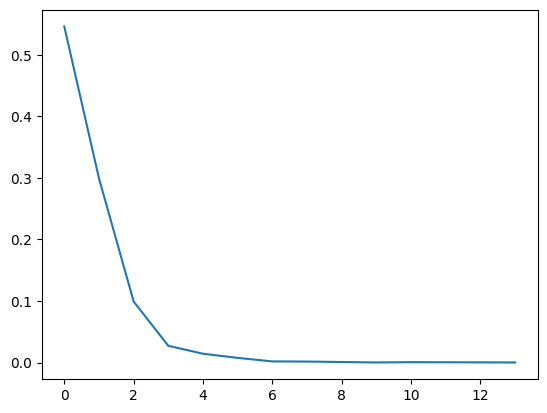

In [36]:
(predictions["diff"].round().value_counts().sort_index() / predictions.shape[0]).plot()

In [37]:
predictions

,actual,prediction,diff
DATE,,,
2013-01-12,26.0,25.102108,0.897892
2013-01-13,25.0,25.786691,0.786691
2013-01-14,26.0,24.769440,1.230560
2013-01-15,26.0,25.516720,0.483280
2013-01-16,26.0,25.581661,0.418339
...,...,...,...
2024-01-14,27.0,27.520237,0.520237
2024-01-15,27.0,26.653954,0.346046
2024-01-16,27.0,26.735515,0.264485


3. Future Prediction

In [38]:
import joblib
# Instantiate the Ridge model
rr = Ridge(alpha=.1)

# Train the model on the entire dataset
rr.fit(weather[predictors], weather["target"])

# Save the model to a file
model_filename = "/content/drive/MyDrive/Colab Notebooks/IOT/ridge_model.joblib"
joblib.dump(rr, model_filename)

['/content/drive/MyDrive/Colab Notebooks/IOT/ridge_model.joblib']

In [39]:
model_filename = "/content/drive/MyDrive/Colab Notebooks/IOT/ridge_model.joblib"
loaded_model = joblib.load(model_filename)

In [40]:
# Get the last date in the dataset
last_date = weather.index[-1]

# Create a new DataFrame with the same features as the current dataset for the next day
new_date = last_date + pd.Timedelta(days=1)
new_data = pd.DataFrame(index=[new_date], columns=predictors)

# Get the values of the features for the last day and assign them to the new day
last_values = weather[predictors].iloc[-1]
new_data[predictors] = last_values.values

# Ensure that the 'index' column of 'new_data' is of datetime type
new_data.index = pd.to_datetime(new_data.index)

# Use the Ridge model to predict for the next day
prediction_for_next_day = loaded_model.predict(new_data[predictors])

# Create a new DataFrame containing the prediction and the corresponding date
prediction_df = pd.DataFrame(index=new_data.index, columns=["Prediction"])
prediction_df["Prediction"] = prediction_for_next_day
prediction_df["Prediction"] = prediction_df["Prediction"].round(2)
# Display the prediction for the next day
print(prediction_df)

            Prediction
2024-01-19       26.83
